In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

from sklearn.preprocessing import LabelEncoder

%matplotlib inline

# Importing and visualizing my dataset

In [2]:
df = pd.read_csv('data/dataset.csv')

In [3]:
df.head()

,store_profit,products_in_stock,product_rating,business,number_of_stores,number_of_employees
0,4338.108328,109.934283,38.617357,souvenirs,2,80
1,1939.910530,112.953771,55.230299,supermarket,1,15
2,299.381392,95.316933,37.658630,construction,7,81
3,565.626098,131.584256,47.674347,souvenirs,4,15
4,365.750750,90.610512,45.425600,toys,11,9


In [4]:
X = df[['products_in_stock', 'product_rating']]
y = df.store_profit

# Elliptic Envelope analysis using numerical X variables

Using Ellipt Envelope considering a 1% contamination

In [5]:
from sklearn.covariance import EllipticEnvelope

clf = EllipticEnvelope(contamination=0.01)
clf.fit(X)
inliers = clf.predict(X)

Text(0.5,1,'EllipticEnvelope - 1%')

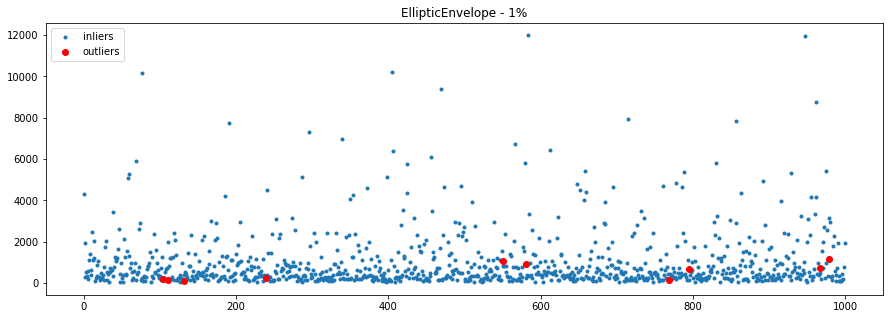

In [6]:
plt.figure(figsize=(15,5))
plt.plot(y[inliers>0],'.')
plt.plot(y[inliers<0],'ro')
plt.legend(['inliers', 'outliers'])
plt.title('EllipticEnvelope - 1%')

Text(0.5,0,'products_in_stock')

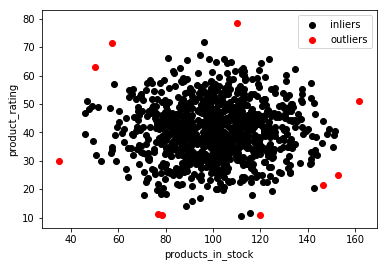

In [7]:
plt.scatter(X['products_in_stock'][inliers>0], X['product_rating'][inliers>0], c='black')
plt.scatter(X['products_in_stock'][inliers<0], X['product_rating'][inliers<0], c='red')
plt.legend(['inliers', 'outliers'])
plt.ylabel('product_rating')
plt.xlabel('products_in_stock')

# Elliptic Envelope analysis using numerical X variables

Using Ellipt Envelope considering a 10% contamination


In [8]:
from sklearn.covariance import EllipticEnvelope

clf = EllipticEnvelope(contamination=0.1)
clf.fit(X, y)
inliers = clf.predict(X)

Text(0.5,1,'EllipticEnvelope - 10%')

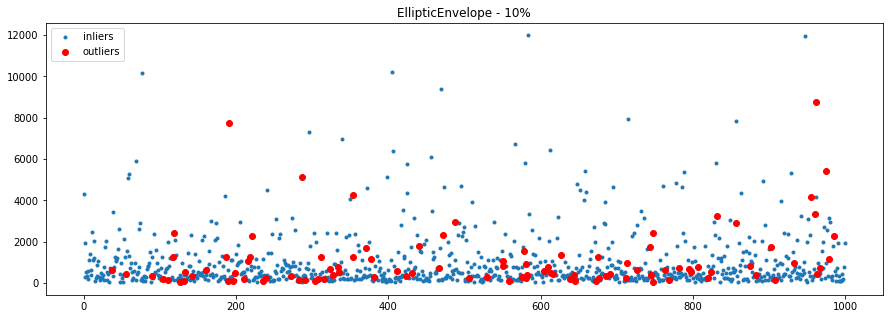

In [9]:
plt.figure(figsize=(15,5))
plt.plot(y[inliers>0],'.')
plt.plot(y[inliers<0],'ro')
plt.legend(['inliers', 'outliers'])
plt.title('EllipticEnvelope - 10%')

Text(0.5,0,'products_in_stock')

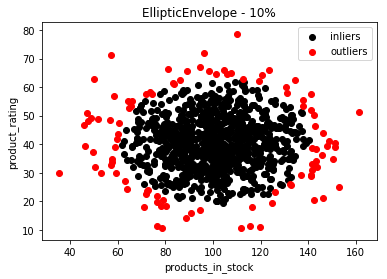

In [10]:
plt.scatter(X['products_in_stock'][inliers>0], X['product_rating'][inliers>0], c='black')
plt.scatter(X['products_in_stock'][inliers<0], X['product_rating'][inliers<0], c='red')
plt.legend(['inliers', 'outliers'])
plt.title('EllipticEnvelope - 10%')
plt.ylabel('product_rating')
plt.xlabel('products_in_stock')

# Elliptic Envelope analysis using only Y

Using Ellipt Envelope considering a 1% contamination and only our variable Y


In [11]:
yy  = y.values.reshape(-1,1)

from sklearn.covariance import EllipticEnvelope

clf = EllipticEnvelope(contamination=0.01)

clf.fit(yy)
inliers = clf.predict(yy)

Text(0.5,1,'EllipticEnvelope - 1%')

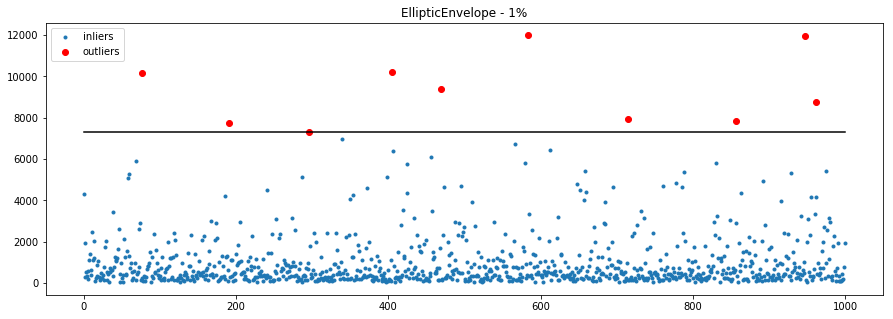

In [12]:
plt.figure(figsize=(15,5))
plt.plot(y[inliers>0],'.')
plt.plot(y[inliers<0],'ro')
plt.plot(np.linspace(min(y[inliers<0]), min(y[inliers<0]), len(y)), 'k')
plt.legend(['inliers', 'outliers'])
plt.title('EllipticEnvelope - 1%')

Text(0.5,0,'products_in_stock')

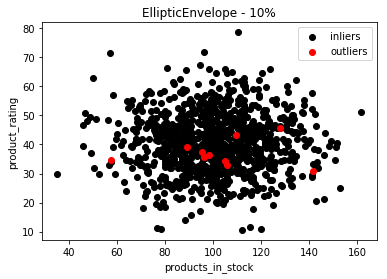

In [14]:
plt.scatter(X['products_in_stock'][inliers>0], X['product_rating'][inliers>0], c='black')
plt.scatter(X['products_in_stock'][inliers<0], X['product_rating'][inliers<0], c='red')
plt.legend(['inliers', 'outliers'])
plt.title('EllipticEnvelope - 10%')
plt.ylabel('product_rating')
plt.xlabel('products_in_stock')